<a href="https://colab.research.google.com/github/ajayrfhp/LearningDeepLearning/blob/main/MultiGPUTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to train a neural net in multiple GPUs
#### Options
- Divide network across GPUs. GPUs would need tignt sync, difficult for large GPUs, Bandwith of GPU buses will be overrun
- Divide each layer, this would also need sync issues
- Divide data across multiple GPUs. All GPUs perform same type of work, aggregate gradients across GPUs after minibatch. Need sync after every minibatch.

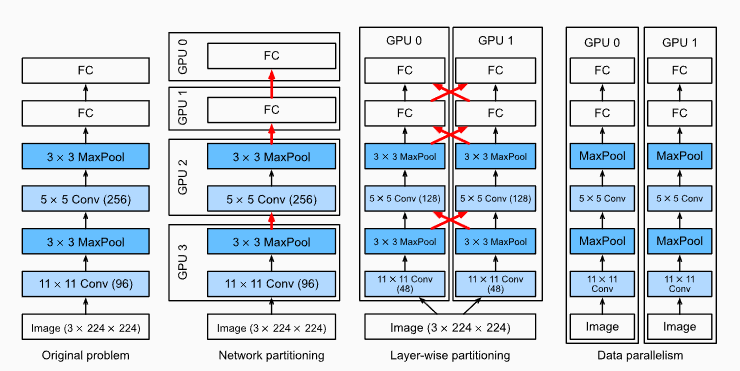


### Data parallelism ftw

- Each GPU maintains a copy of the network. Input batches are divided among GPUs, each GPU does forward prop, calculates local gradient. Gradients are aggregated to get global gradient, global gradient update is made for each GPU.
- In each epoch, each GPU should have same network weight.

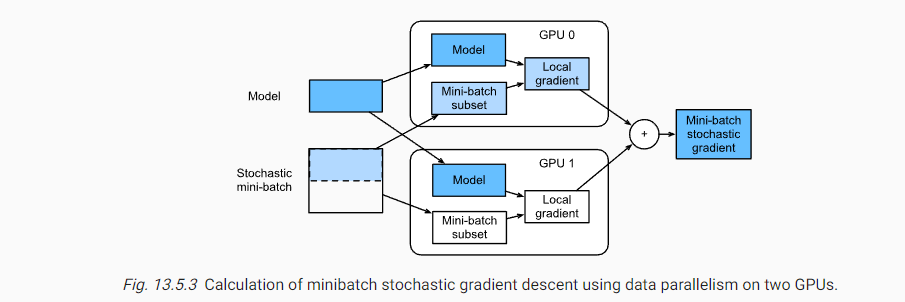


### Distribute parameters to gpu
- nn.parallel.scatter function can be used to evenly distribute data to GPUs

### Aggregate gradients from all the GPUs

**nn.Parallel vs nn.DataParallel**
- One process overall vs one process per GPU
- nn.DataParallel uses one process overall to compute model weights and distribute them to each GPU during each batch. Networking becomes bottleneck and GPU utilization is low
- If we have mulitple processes, each process loads its own minibatch from disk, passes to GPU, does forward pass, only the gradients are passed around to sync.

- Function `distributed.init_process_group` is used for synctronization. Function `nn.utils.data.DistributedSampler` is used for dividing batches in a non overlapping function

